In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from torch.optim import SGD
import torch.nn as nn
import torchvision
from tqdm import tqdm
import matplotlib.pyplot as plt

import sys
sys.path.append("/gdrive/MyDrive/work_space/GAN_stuff")

from utils.mnist_dataset import MNISTDataset

In [3]:
DATA_DIR = "/gdrive/MyDrive/work_space/GAN_stuff/MNIST"
DEVICE = "cuda"

Z_LENGTH = 128

N_EPOCHS = 100
BATCH_SIZE = 64

NN classes

In [4]:
# NN classes

class Generator(nn.Module):
    def __init__(self,latent_dims):
        super(Generator, self).__init__()

        self.img_shape = [1, 28, 28]

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dims, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(self.img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), *self.img_shape)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.img_shape = [1, 28, 28]

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(self.img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)

        return validity


Utility functions

In [5]:
def get_noise_vector(z_size):
	return torch.rand(z_size)

Initialization

In [10]:
train_dataset = MNISTDataset(DATA_DIR, subset_name='train')
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

generator = Generator(Z_LENGTH).to(DEVICE)
discriminator = Discriminator().to(DEVICE)

gen_optimizer = SGD(generator.parameters(), lr=0.0002, momentum=0.7)
discrim_optimizer = SGD(discriminator.parameters(), lr=0.0003, momentum=0.7)
criterion = nn.BCELoss(reduction='mean')

Training loop

Epoch: 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.42623242208444234 | G loss: 0.7006681686017051


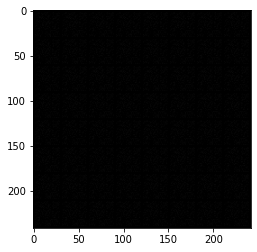

Epoch: 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.29185130890371447 | G loss: 0.840368087421348


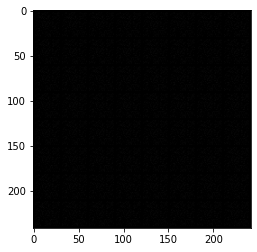

Epoch: 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.23562409855854283 | G loss: 0.9938024088009588


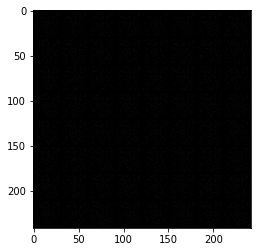

Epoch: 4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.1943361567281711 | G loss: 1.1450983402825623


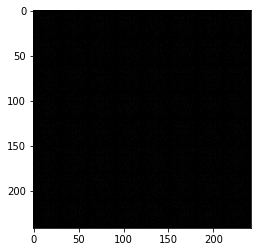

Epoch: 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.1621650506470249 | G loss: 1.2945409640828685


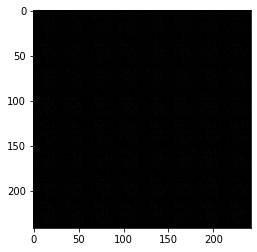

Epoch: 6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.1365951604680466 | G loss: 1.4413670354814672


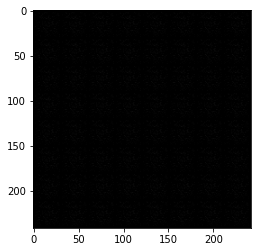

Epoch: 7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.11640501197880265 | G loss: 1.5821370096094827


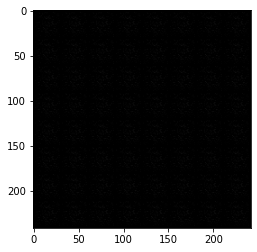

Epoch: 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.10084335211275229 | G loss: 1.7119071857253116


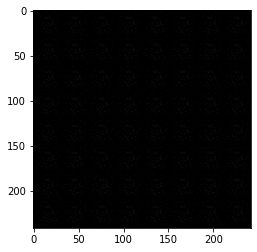

Epoch: 9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.08929392152916649 | G loss: 1.825967587387638


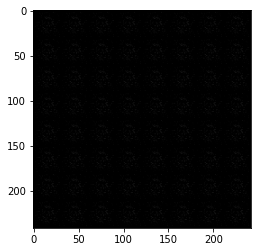

Epoch: 10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.08051651512095923 | G loss: 1.929177979670608


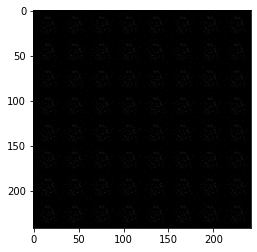

Epoch: 11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.07358199117312045 | G loss: 2.027187767567665


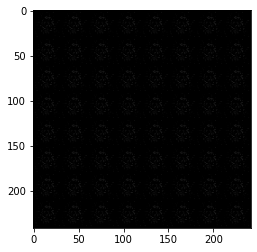

Epoch: 12


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.06835239427462061 | G loss: 2.1151474266926615


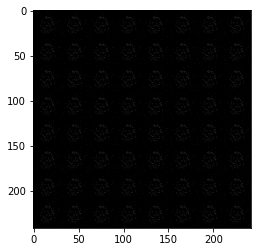

Epoch: 13


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.06427619746848465 | G loss: 2.1938386454002687


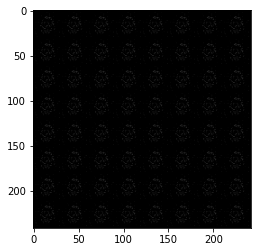

Epoch: 14


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.06059180789474231 | G loss: 2.2725599711891937


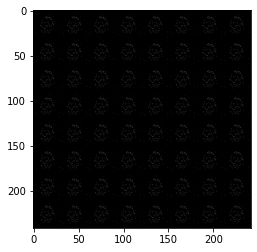

Epoch: 15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.05702338761675841 | G loss: 2.358145776079662


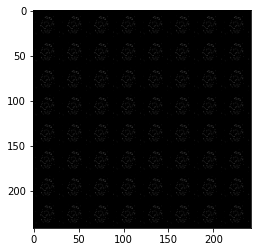

Epoch: 16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.054809517832770785 | G loss: 2.4307537821055982


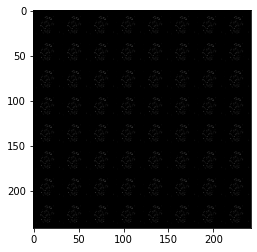

Epoch: 17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.057906343631430476 | G loss: 2.422073598101195


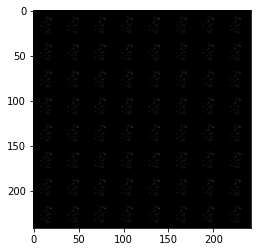

Epoch: 18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.07105777314556305 | G loss: 2.282100275889643


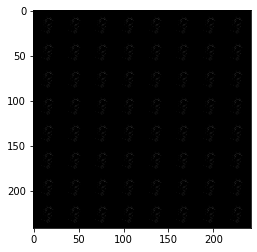

Epoch: 19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.09952867336904825 | G loss: 2.0272432381410335


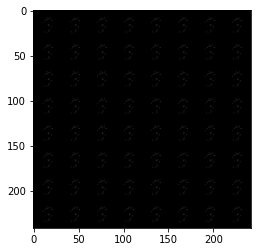

Epoch: 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.1358424780100012 | G loss: 1.7965725629822786


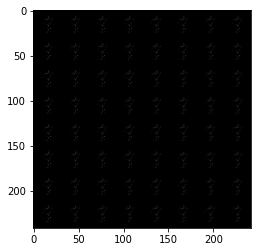

Epoch: 21


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.14282487704555616 | G loss: 1.8030143291202945


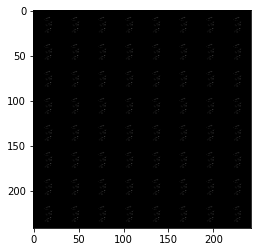

Epoch: 22


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.14262810640180035 | G loss: 1.8488464352926974


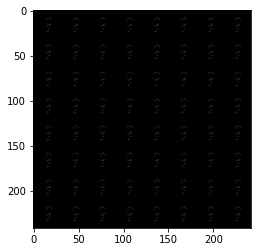

Epoch: 23


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.13285541060223763 | G loss: 1.953166492712269


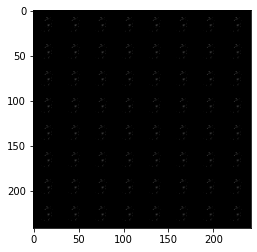

Epoch: 24


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.12184955983527943 | G loss: 2.064254474792399


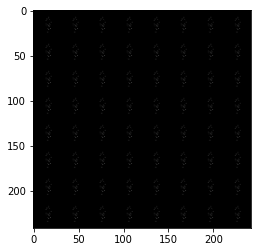

Epoch: 25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.09825284211938061 | G loss: 2.2916100764833787


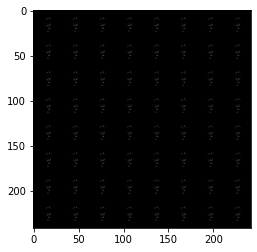

Epoch: 26


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.07661197738034893 | G loss: 2.5442839784662863


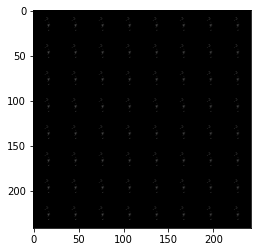

Epoch: 27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.060032180857969755 | G loss: 2.798729939247245


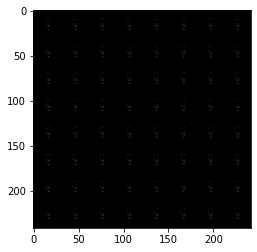

Epoch: 28


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.050003757434231896 | G loss: 2.9866750868144574


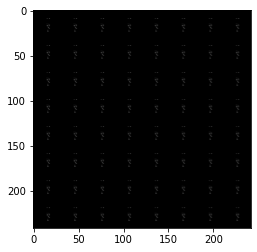

Epoch: 29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.04029706485077008 | G loss: 3.2023187204718844


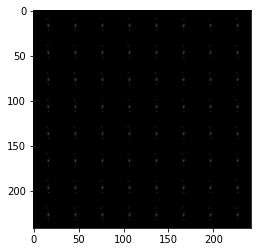

Epoch: 30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.03462246120341424 | G loss: 3.3611830381442234


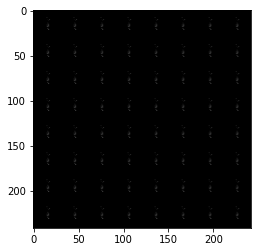

Epoch: 31


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.029983607094997027 | G loss: 3.5125878182555565


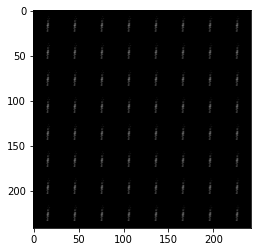

Epoch: 32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.02953741365054777 | G loss: 3.5565955298287526


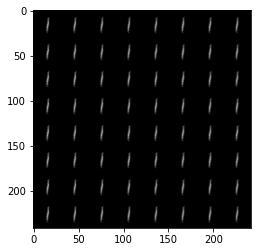

Epoch: 33


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.029040646698595934 | G loss: 3.624718697086326


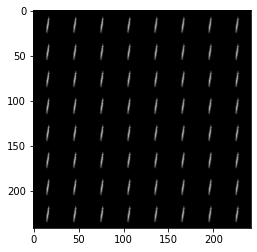

Epoch: 34


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.02736711810464099 | G loss: 3.7138930719290206


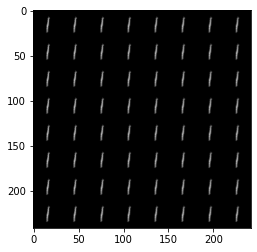

Epoch: 35


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.025724099813970423 | G loss: 3.796324182675083


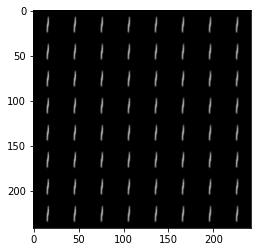

Epoch: 36


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.024412363033884686 | G loss: 3.8653848875306056


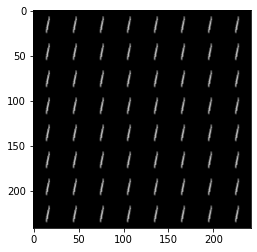

Epoch: 37


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


D loss: 0.02378944150789746 | G loss: 3.9169353732168037


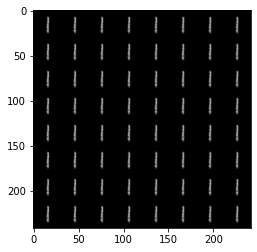

Epoch: 38


KeyboardInterrupt: ignored

In [11]:

# Training loop
for epoch in range(1, N_EPOCHS):
  
  print("Epoch:", epoch)
  epoch_discrim_loss = 0
  epoch_gen_loss = 0
  
  for batch in train_loader:

    # Discriminator phase --
    real_images = batch['image'].to(DEVICE).float()
    ones = torch.ones(real_images.shape[0], 1, device=DEVICE)

    noise_batch = get_noise_vector(z_size=(BATCH_SIZE, Z_LENGTH)).to(DEVICE)
    with torch.no_grad():
      fake_images = generator(noise_batch)
    zeros = torch.zeros(fake_images.shape[0], 1, device=DEVICE)

    # Forward pass and update D
    discrim_optimizer.zero_grad()  
    reals_loss = criterion(discriminator(real_images), ones)
    fakes_loss = criterion(discriminator(fake_images), zeros)
    discrim_loss = (reals_loss + fakes_loss) / 2
    discrim_loss.backward(retain_graph=True)
    discrim_optimizer.step()


    # Generator phase --
    gen_optimizer.zero_grad()
    noise_batch = get_noise_vector(z_size=(BATCH_SIZE, Z_LENGTH)).to(DEVICE)
    fake_images = generator(noise_batch)
    discrim_pred = discriminator(fake_images)
    ones = torch.ones(BATCH_SIZE, 1, device=DEVICE)

    # Update G
    gen_loss = criterion(discrim_pred, ones)
    gen_loss.backward()
    gen_optimizer.step()

    epoch_discrim_loss += discrim_loss.item()
    epoch_gen_loss += gen_loss.item()


  epoch_discrim_loss /= len(train_loader)
  epoch_gen_loss /= len(train_loader)
  print("D loss:", epoch_discrim_loss, "| G loss:", epoch_gen_loss)

  if epoch % 1 == 0:
    grid = torchvision.utils.make_grid(fake_images.cpu().detach())
    plt.imshow(grid.permute(1,2,0))
    plt.show()